In [2]:
# 必要依赖：https://github.com/ecmwf/cfgrib
# conda install -c conda-forge eccodes
# conda install -c conda-forge cfgrib
import xarray
from datetime import datetime, timedelta
import numpy
import matplotlib.pyplot as plt

In [3]:
# Forecast albedo 0.1° x 0.1°
era5_albedo_grib = '/disk2/Data/ERA5_Albedo/2018_01.grib'

In [4]:
albedo_ds = xarray.load_dataset(era5_albedo_grib, engine="cfgrib")

/home/beichen/anaconda3/envs/python36/lib/python3.6/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
albedo_ds.dims

Frozen(SortedKeysDict({'time': 32, 'step': 24, 'latitude': 301, 'longitude': 301}))

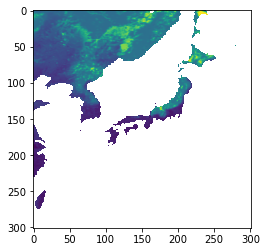

In [6]:
plt.imshow(numpy.array(albedo_ds.to_array())[0,0,23,:,:]) #！！！！！！

Text(0.5, 1.0, 'Original albedo at UTC 2018-01-01 03:00:00')

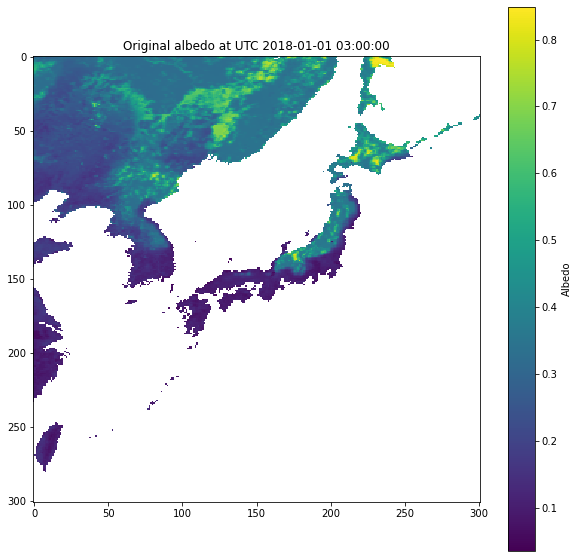

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(albedo_ds.to_array()[0,1,2, :,:], interpolation='None')
plt.colorbar(label='Albedo')
plt.title('Original albedo at UTC 2018-01-01 03:00:00')

In [9]:
# JP extent
resolution = 0.01 # degree
lats = numpy.arange(50.-resolution/2, 20, -resolution)
lons = numpy.arange(120.+resolution/2, 150, resolution)

In [10]:
day_num = 1 # 1 -> 31(?)
hour_idx = 2 # 0 <=> 01:00:00

albedo_dh = albedo_ds.isel(time=day_num, step=hour_idx)
jp_ds = albedo_dh.interp(longitude=lons, latitude=lats, method="nearest", kwargs={"fill_value": "extrapolate"}) # linear
albedo_v = jp_ds.to_array()[0]

Text(0.5, 1.0, '0.01° albedo in study extent at 2018-01-01 03:00:00')

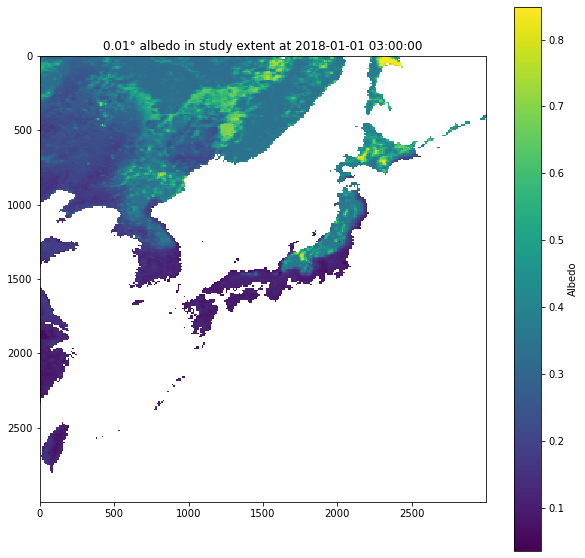

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(albedo_v, interpolation='None')
plt.colorbar(label='Albedo')
plt.title('0.01° albedo in study extent at 2018-01-01 03:00:00')